In [41]:
import numpy as np
import os
import pickle
from glob import glob
from tqdm import tqdm
import time
from pprint import pprint as pp
from pathlib import Path
import shutil
import random
from matplotlib import pyplot as plt

In [78]:
 names = np.array(['speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'speed limit 80', 
          'restriction ends 80', 'speed limit 100', 'speed limit 120', 'no overtaking', 'no overtaking', 
          'priority at next intersection', 'priority road', 'give way', 'stop', 'no traffic both ways', 'no trucks', 
          'no entry', 'danger', 'bend left', 'bend right', 'bend', 'uneven road', 'slippery road', 'road narrows', 
          'construction', 'traffic signal', 'pedestrian crossing', 'school crossing', 'cycles crossing', 'snow', 
          'animals', 'restriction ends', 'go right', 'go left', 'go straight', 'go right or straight', 'go left or straight', 
          'keep right', 'keep left', 'roundabout', 'restriction ends', 'restriction ends'])
          
def xyxy2xywhn(x, w=1360, h=800):
    y = np.copy(x)
    y[0] = ((x[0] + x[2]) / 2) / w  # x center
    y[1] = ((x[1] + x[3]) / 2) / h  # y center
    y[2] = (x[2] - x[0]) / w  # width
    y[3] = (x[3] - x[1]) / h  # height
    return y

def save_label(fname, lines):
    with open(fname,'w') as fl:
        for ll in lines:
            fl.write("{} {} {} {} {}\n".format(*ll))

def make_dirs(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)

dataroot = "/home/ubuntu/Shlok/gtsdb/data"

In [89]:
full_labelist = glob(os.path.join(dataroot, "full", "labels")+"/*.txt")
full_labelist[:5]

['/home/ubuntu/Shlok/gtsdb/data/full/labels/00281.txt',
 '/home/ubuntu/Shlok/gtsdb/data/full/labels/00305.txt',
 '/home/ubuntu/Shlok/gtsdb/data/full/labels/00112.txt',
 '/home/ubuntu/Shlok/gtsdb/data/full/labels/00644.txt',
 '/home/ubuntu/Shlok/gtsdb/data/full/labels/00374.txt']

In [85]:
def plot_distribution(labelist, split):
    label_to_files = {}
    for lblfile in labelist:
        lines = open(lblfile).read().split('\n')[:-1]
        labels = list(map(lambda x: x.split()[0], lines))
        for label in labels:
            label = int(label)
            if label not in label_to_files:
                label_to_files[label] = [lblfile]
            else:
                label_to_files[label].append(lblfile)

    label_to_no = {_k:len(label_to_files[_k]) for _k in label_to_files}
    # pp(label_to_no)
    _ltn = sorted(list(label_to_no.items()), key=lambda x: x[0])
    _ltnc = [x[0] for x in _ltn]
    _ltnn = [x[1] for x in _ltn]

    label_to_no_set = {_k:len(set(label_to_files[_k])) for _k in label_to_files}
    _ltns = sorted(list(label_to_no_set.items()), key=lambda x: x[0])
    _ltncs = [x[0] for x in _ltns]
    _ltnns = [x[1] for x in _ltns]

    plt.figure(figsize=(16,4))
    plt.bar(names[_ltnc], _ltnn)
    plt.xticks(rotation=90)
    plt.bar(names[_ltncs], _ltnns)
    plt.xticks(rotation=90)
    plt.title("Class distribution ({})".format(split))
    plt.show()

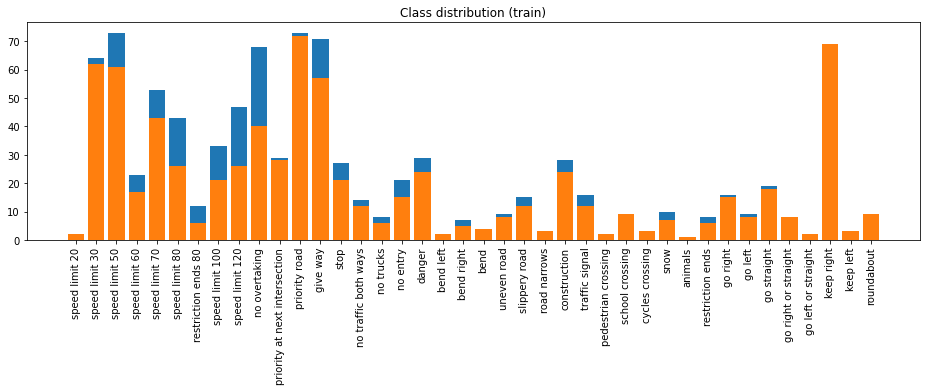

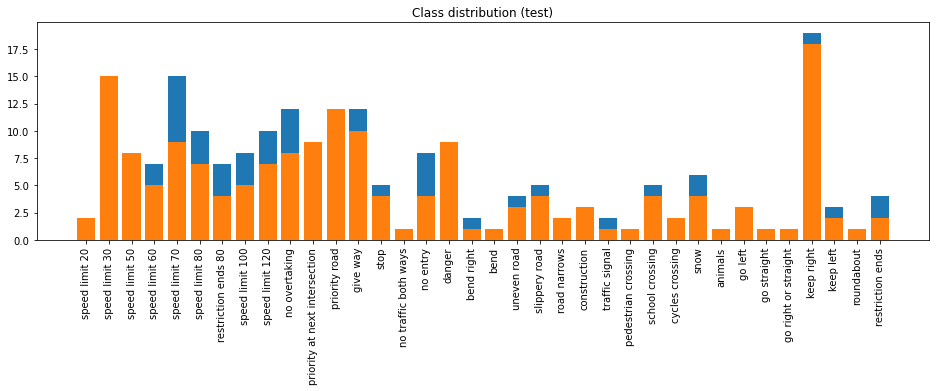

In [88]:

plot_distribution(full_labelist[:600], "train")
plot_distribution(full_labelist[600:], "test")